# **Import Library dan Pembacaan Dataset**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from scipy.stats import chi2_contingency

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [90]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [91]:
# Hitung Total Pendapatan
total_pendapatan = df['MonthlyCharges'].sum()

# Hitung Total Biaya dari pelanggan yang berhenti berlangganan (Churn = 'Yes')
total_biaya_churn = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()

# Hitung Persentase Profit
profit_percentage = ((total_pendapatan - total_biaya_churn) / total_pendapatan) * 100

print(f'Persentase Profit: {profit_percentage:.2f}%')

Persentase Profit: 69.37%


In [92]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

# **Check kolom unik**

In [93]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Dependents - Unique Values: ['Yes' 'No']
Column: tenure - Unique Values: [ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['No' 'Yes' 'No internet service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: DeviceProtection - Unique Values: ['Yes' 'No internet service' 'No']
Column: TechSupport - Unique Values: ['Yes' 'No' 'No internet service']
Column: Contract - Unique Values: ['Month-to-month' 'Two year' 'One year']
Column: PaperlessBilling - Unique Values: ['Yes' 'No']
Column: MonthlyCharges - Unique Values: [ 72.9   82.65  47.85 ...  58.45  23.65 108.5 ]
Column: Churn - Unique Values: ['Yes' 'No']


**Data yang ditunjukkan pada hasil kolom unik di atas dapat dibagi menjadi 3 grup yaitu**

**1.  Informasi Demografi**

Dependents: Aapakah client memiliki tanggungan atau tidak (Yes/No)

**2. Informasi Akun Customer**

Tenure : Berapa bulan customer berlangganan dengan perusahaan (Value berbeda-beda)

Contract : Tipe kontrak dari customer ('Month-to-month' 'Two year' 'One year')

PaperlessBilling : Apakah customer memiliki tagihan tanpa kertas atau tidak (Yes/No)

MonthlyCharges : Perubahan tagihan bulanan customer (Value berbeda-beda)

**3. Informasi Servis**

InternetService: Apakah client telah subscribed ke Internet service perusahaan ('DSL' 'Fiber optic' 'No')

OnlineSecurity : Apakah client memiliki online security atau tidak (Yes/No)

OnlineBackup : Apakah client memiliki backup secara online atau tidak (Yes/No)

DeviceProtection : Apakah client memiliki proteksi device atau tidak (Yes/No)

TechSupport : Apakah client memiliki tech support atau tidak (Yes/No)



# **Cleaning dan Eksplorasi Data**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


**Pada data di atas, ditunjukkan bahwa ada 4930 data observasi dan 11 kolom, terlihat tidak ada yang bermasalah pada tipe - tipe kolomnya, lanjut ke eksplorasi berikutnya**

In [95]:
# Memeriksa data NaN di seluruh kolom
nan = df.isna().sum()
print(nan)

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


In [96]:
# Memeriksa data null di seluruh kolom
null = df.isnull().sum()
print(null)

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


**Terlihat tidak ada data NaN dan Null di dalam data ini, jadi kita bisa lanjutkan ke proses Visualisasi Data**

# **Visualisasi Data**

***Visualisasi Variabel Yes dan No***

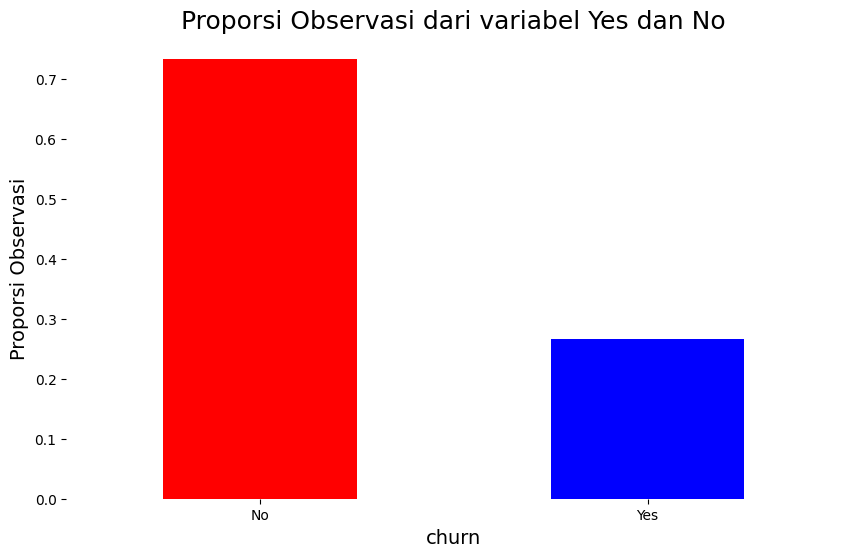

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Proporsi dari observasi setiap kelas
prop_response = df['Churn'].value_counts(normalize=True)

# Buat bar plot untuk menampilkan persentase churn
prop_response.plot(kind='bar',
                   ax=ax,
                   color=['red','blue'])

# Buat judul dan label
ax.set_title('Proporsi Observasi dari variabel Yes dan No',
             fontsize=18)
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('Proporsi Observasi',
              fontsize=14)
ax.tick_params(rotation='auto')

spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

**Seperti dilihat pada bar plot di atas, ini merupakan persentase observasi yang sesuai dengan setiap kelas dari variabel : No dan Yes. Persebaran kelas terliaht tidak merata, dan kelas No lebih tinggi. Ketidakseimbangan ini akan mengarahkan jumlah False Negatives yang lebih besar**

***Visualisasi Informasi Demografi***

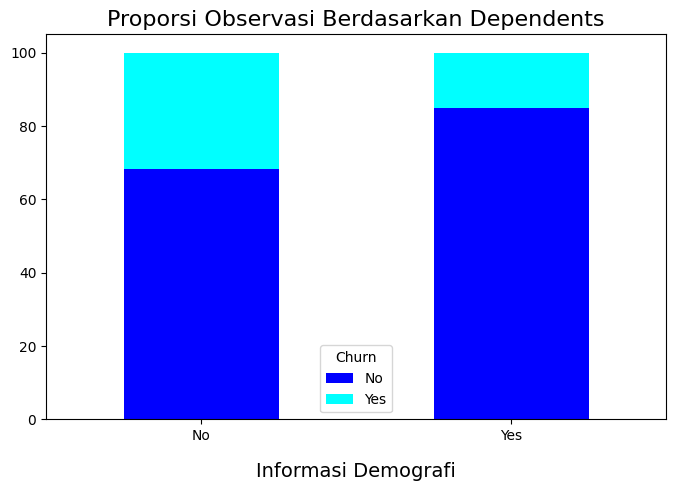

In [98]:
def persentase_plot(column_to_plot, super_title):
    # Membuat plot
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle(super_title, fontsize=22)

    # Menghitung persentase pengamatan variabel respons untuk setiap kelompok variabel independen
    prop_by_independent = pd.crosstab(df[column_to_plot], df['Churn']).apply(lambda x: x / x.sum() * 100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['blue', 'cyan'])

    ax.legend(title='Churn')

    # Buat judul dan label
    ax.set_title('Proporsi Observasi Berdasarkan ' + column_to_plot, fontsize=16)
    ax.set_xlabel('')
    ax.text(0.5, -0.15, 'Informasi Demografi', fontsize=14, ha='center', transform=ax.transAxes)
    plt.show()

# Kolom yang ditampilkan
demografi = 'Dependents'
persentase_plot(demografi, '')

**Terlihat pada plot histogram di atas, ditampilkan proporsi observasi dari Dependents dari setiap kelas response (No dan Yes), dari plot in idapat disimpulkan bahwa customer yang memiliki tanggungan (Dependents) lebih sedikit dari yang tidak memiliki tanggungan**

***Visualisasi Akun Customer***

**Pada visualiasi ini, dilakukan evaluasi persentase Churn dari kategori Akun Customer (Contract dan PaperlessBilling)**

In [99]:
def persentase_plot(column_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(column_to_plot)/2)
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop setiap nama kolom untuk dimasukkan dalam subplot
    for index, column in enumerate(column_to_plot, 1):

        # Membuat subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # menghitung persentase pengamatan variabel respons untuk setiap kelompok variabel independen
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['cyan','orange'])

        # set posisi legend
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # membuat judul dan label
        ax.set_title('Proporsi Observasi Berdasarkan ' + column, fontsize=13, y=-0.2)

        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


In [100]:
akun = ['Contract', 'PaperlessBilling']

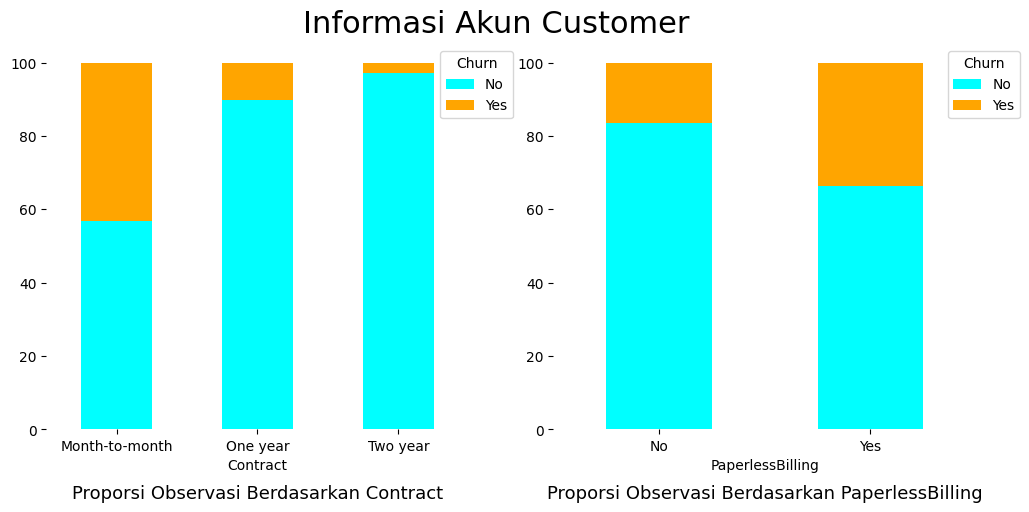

In [101]:
persentase_plot(akun, 'Informasi Akun Customer')

**Kesimpulan dari histogram pada kategori customer account ini adalah**

**Customer dengan kontrak month-to-month memiliki rating churn tertinggi daripada kontrak tahunan dan 2 tahunan**

**Customer dengan pembayaran paperless lebih banyak daripada yang tidak paperless**

***Visualisasi Informasi Akun Customer dengan Variabel Numerikal***

pada plot ini digunakan kolom tenure, MonthlyCharges, Total Charges berdasarkan Churn

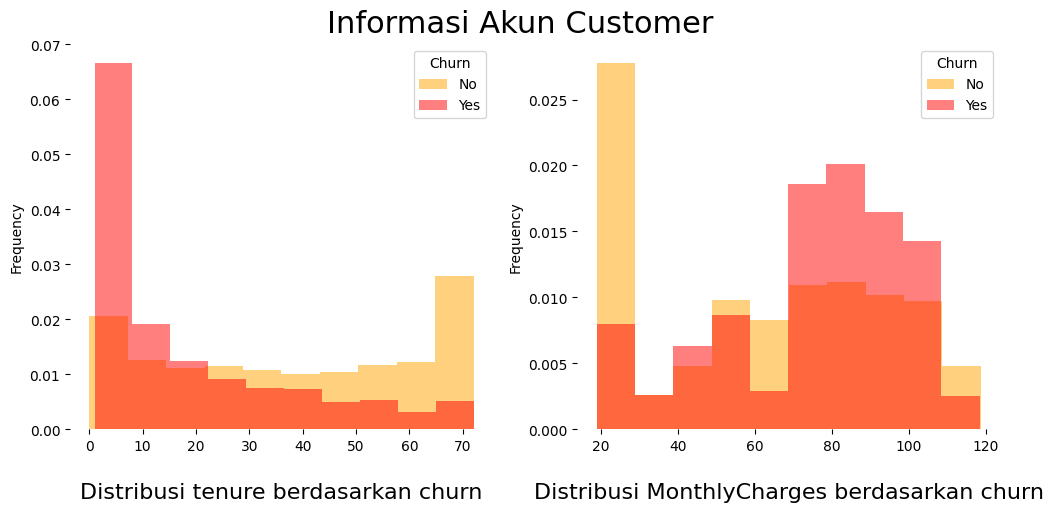

In [102]:
def histogram_plots(columns_to_plot, super_title):

    # Tentukan jumlah baris dan kolom
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop setiap kolom demografi untuk dijadikan subplot
    for index, column in enumerate(columns_to_plot, 1):

        # Membaut subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms untuk setiap kelas (histogram yang telah dinormalisasi)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='orange', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='red', label='Yes')

        # set posisi legend
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # Membuat judul dan label
        ax.set_title('Distribusi ' + column + ' berdasarkan churn',
                     fontsize=16, y=-0.2)

        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# nama kolom akun customer
account_columns_numeric = ['tenure', 'MonthlyCharges']
# histogram dari kolom akun customer
histogram_plots(account_columns_numeric, 'Informasi Akun Customer')

**Kesimpulan dari histogram di atas adalah:**

**rate churn lebih besar saat monthly charges tinggi**

**customer baru(tenure rendah) cenderung churn**

***Visualisasi Informasi Servis***

**pada plot ini digunakan kolom MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection' dan 'TechSupport'**

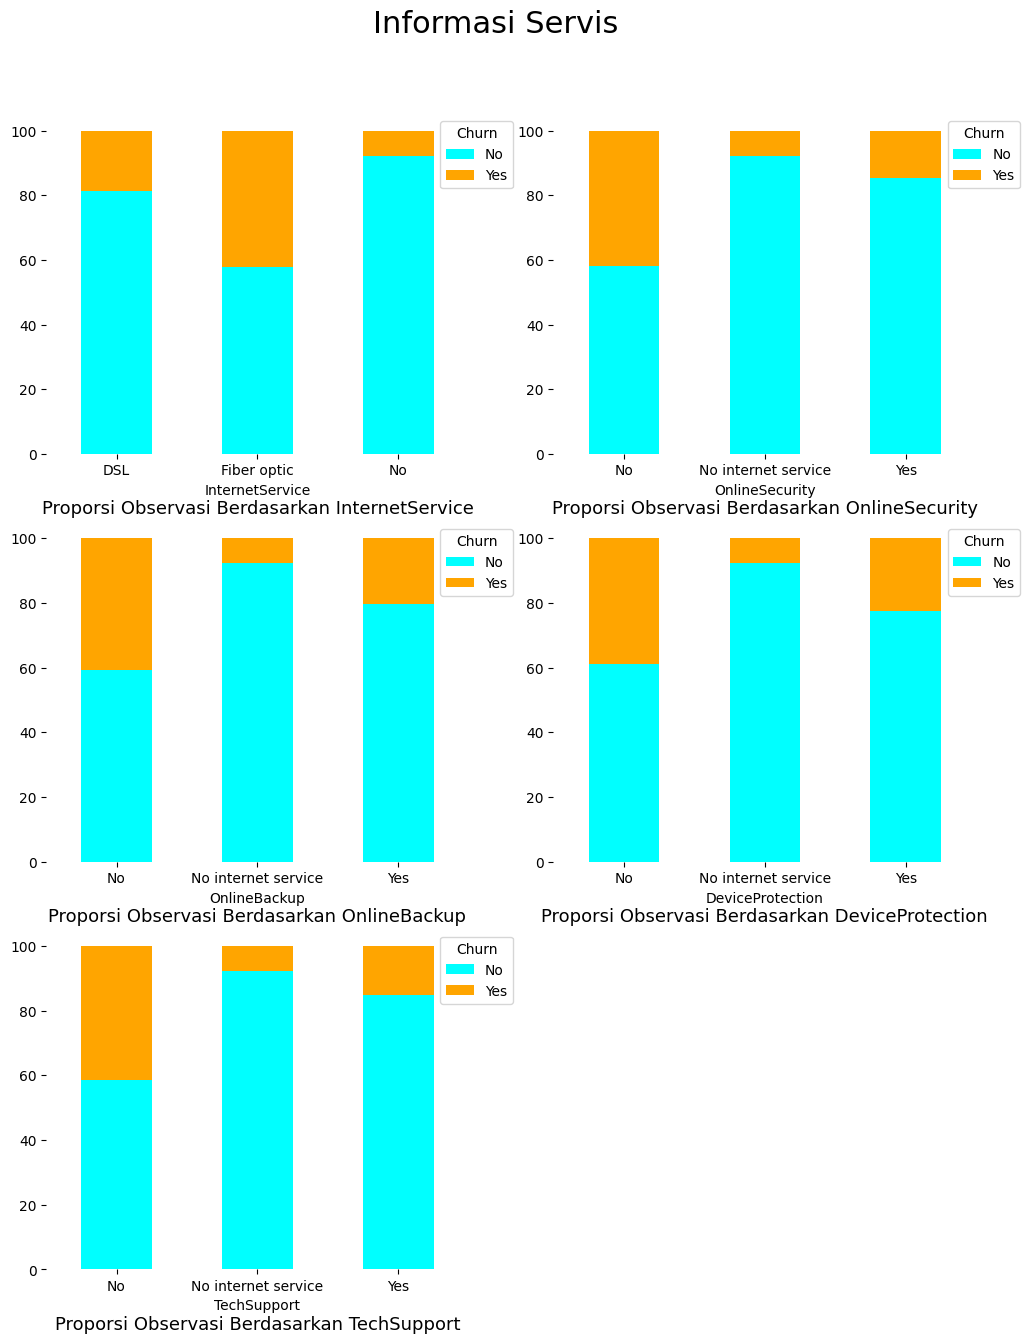

In [103]:
servis = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
persentase_plot(servis, 'Informasi Servis')

**Kesimpulan dari histogram ini :**

**Persentase churcn dari seluruh kelas hampir seluruhnya sama**

**Client dengan online security lebih sedikit daripada yang tanpa online security**

**Customer tanpa tech support lebih banyak daripada yang dengan tech support**

# **Feature Importance**

**Feature Importance ini adalah bagian untuk mengukur sejauh mana skor antara variabel kategorikal berhubungan dengan variabel target 'Churn' , semakin tinggi skornya semakin besar pengaruhnya. Hasil dari perhitungan ini diurutkan secara descending dan diplot dalam histogram horizontal**

Contract            870.121511
OnlineSecurity      580.829899
TechSupport         558.486545
InternetService     514.527398
OnlineBackup        445.104879
DeviceProtection    373.507074
PaperlessBilling    174.755767
Dependents          143.443931
dtype: float64


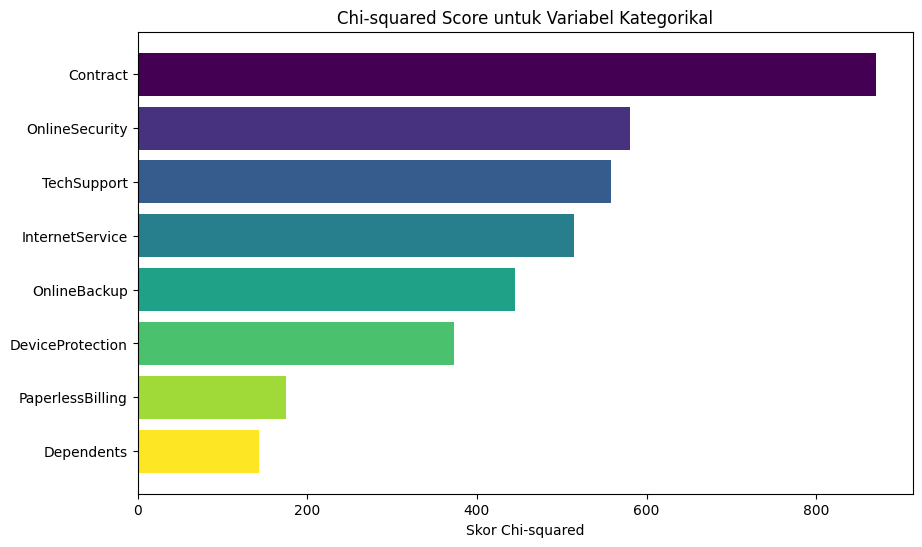

In [104]:
# Fungsi yang menghitung Chi-squared dan pengaruh variabel terhadap Churn
def hitung_chi2_score(categorical_serie):
    contingency_table = pd.crosstab(categorical_serie, df['Churn'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    return chi2

# Pilih variabel kategorikal, kecuali variabel respons
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# Hitung skor Chi-squared untuk setiap variabel kategorikal
feature_importance = categorical_variables.apply(hitung_chi2_score).sort_values(ascending=False)

# Visualisasikan pengaruh fitur
print(feature_importance)

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance, color=colors)
plt.xlabel('Skor Chi-squared')
plt.title('Chi-squared Score untuk Variabel Kategorikal')
plt.gca().invert_yaxis()
plt.show()

**Kesimpulan dari histogram ini adalah :**

**Pengaruh paling sgnifikan terhadap variabel target 'Churn' terdapat pada Contract,OnlineSecurity, dan TechSupport. Sedangkan InternetService, OnlineBackup, DeviceProtection, PaperlessBilling, dan Dependents juga memiliki pengaruh, tetapi lebih rendah**

# **Feature Selection**


**Bagian ini bertujuan untuk memisahkan fitur X dan label y, model akan mempelajari relasi antara fitur dalam X dan label y dalam membuat prediksi apakah pelanggan akan berhenti berlangganan (churn) atau tidak**

In [105]:
# Pisahkan fitur dan label
X = df.drop(columns='Churn')
y = df['Churn']

**Bagian ini bertujuan untuk split dataset, 25% dari data akan digunakan untuk data test**

In [106]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32, shuffle=True)

**Bagian ini bertujuan menentukan kolom kategorikal dan numerikal, ini merupakan langkah awal proses data sebelum dimasukkan dalam model. Untuk categorical_cols, dipilih nama-nama kolom yang memiliki tipe data 'object' kemudian untuk numerical_cols dipilih kolom-kolom yang memiliki tipe data bukan 'object'**

In [107]:
# Definisi transformer untuk variabel numerik dan kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# **Pemodelan dengan Support Vector Classifier**

**Pada bagian ini digunakan 'ColumnTransformer' untuk penggabungan 2 jenis transformasi pada data:**

**1. StandarScaler untuk variabel numerik(scaling)**

**2. OneHotEncoder untuk variabel kategorikal(one hot encoding)**

**selanjutnya dibuat sebuah pipeline untuk menggabungkan preprocessor dan model Support Vector Classifier untuk melatih model. Kemudian model dilatih pada data train (X_train dan y_train)**

In [108]:
# ColumnTransformer untuk menggabungkan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling variabel numerik
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One hot encoding variabel kategorikal
    ])

# Buat pipeline dengan preprocessor dan model Support Vector Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=32))
])

# Latih model dengan pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('model', SVC(random_state=32))])

**Pada bagian ini dilakukan evaluasi model, prosesnya sebagai berikut:**

**1. Menggunakan cross validation sebanyak 5 fold dan menampilkan hasil dari cross validation beserta rata-rata keseluruhannya**

**2. Model digunakan untuk membuat prediksi pada data test (X_test), akurasi dari model dikalkulasi dengan metrik akurasi**

**3. Hasil akurasi, confusion matrix, classification report ditampilkan untuk memberikan gambaran kinerja dalam mengklasifikasikan data test**

In [109]:
# Gunakan validasi silang (cross-validation) untuk mengevaluasi model
cross_val_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Rata-rata Cross-Validation Score:", cross_val_scores.mean())

# Buat prediksi dengan pipeline pada data test
predictions = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Support Vector Classifier (SVC) Akurasi:", accuracy)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Cross-Validation Scores: [0.79817444 0.79208925 0.80121704 0.78093306 0.80730223]
Rata-rata Cross-Validation Score: 0.7959432048681542
Support Vector Classifier (SVC) Akurasi: 0.7915652879156528
Confusion Matrix:
[[820  78]
 [179 156]]
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86       898
         Yes       0.67      0.47      0.55       335

    accuracy                           0.79      1233
   macro avg       0.74      0.69      0.71      1233
weighted avg       0.78      0.79      0.78      1233



In [110]:
# Menghitung ChurnHasilConfusion berdasarkan confusion matrix
df['ChurnHasilConfusion'] = ''

for i in range(len(X_test)):
    if y_test.values[i] == 'Yes' and predictions[i] == 'Yes':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'TP'
    elif y_test.values[i] == 'No' and predictions[i] == 'No':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'TN'
    elif y_test.values[i] == 'No' and predictions[i] == 'Yes':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'FP'
    elif y_test.values[i] == 'Yes' and predictions[i] == 'No':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'FN'

# Filter hanya baris yang memiliki nilai 'TP', 'TN', 'FP', atau 'FN' pada kolom 'ChurnHasilConfusion'
filtered_df = df[df['ChurnHasilConfusion'].isin(['TP', 'TN', 'FP', 'FN'])]

# Membuat kolom 'ChurnPredicted' berdasarkan 'ChurnHasilConfusion'
filtered_df['ChurnPredicted'] = filtered_df['ChurnHasilConfusion'].apply(
    lambda x: 'Yes' if x in ['TP', 'FP'] else 'No' if x in ['TN', 'FN'] else ''
)

filtered_df

<ipython-input-110-d1de131e9a12>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ChurnPredicted'] = filtered_df['ChurnHasilConfusion'].apply(


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,ChurnHasilConfusion,ChurnPredicted
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,FN,No
8,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,73.50,No,FP,Yes
13,No,1,No,No,DSL,No,Yes,Month-to-month,No,30.55,No,TN,No
22,Yes,34,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.65,No,TN,No
25,Yes,40,No,No,Fiber optic,Yes,No,Month-to-month,Yes,81.20,No,TN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,No,68,Yes,Yes,Fiber optic,Yes,No,One year,No,101.35,No,TN,No
4918,No,10,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,24.00,No,TN,No
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No,FP,Yes
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No,TN,No


**Persentase profit dari Churn yang belum diprediksi**

In [111]:
pendapatan_yes = filtered_df[filtered_df['Churn'] == 'Yes']['MonthlyCharges'].sum()
pendapatan_no = filtered_df[filtered_df['Churn'] == 'No']['MonthlyCharges'].sum()

total_pendapatan = filtered_df['MonthlyCharges'].sum()
print("Pendapatan (harga per bulan) untuk 'Yes':", pendapatan_yes)
print("Pendapatan (harga per bulan) untuk 'No':", pendapatan_no)

profit_percentage = ((pendapatan_no - pendapatan_yes) / total_pendapatan) * 100
print("Persentase Profit:", profit_percentage)

Pendapatan (harga per bulan) untuk 'Yes': 25667.699999999997
Pendapatan (harga per bulan) untuk 'No': 56216.799999999996
Persentase Profit: 37.307549047744075


**Persentase profit dari Churn yang telah diprediksi dengan Model SVC**

In [112]:
pendapatan_yes = filtered_df[filtered_df['ChurnPredicted'] == 'Yes']['MonthlyCharges'].sum()
pendapatan_no = filtered_df[filtered_df['ChurnPredicted'] == 'No']['MonthlyCharges'].sum()

total_pendapatan = filtered_df['MonthlyCharges'].sum()
print("Pendapatan (harga per bulan) untuk 'Yes':", pendapatan_yes)
print("Pendapatan (harga per bulan) untuk 'No':", pendapatan_no)

profit_percentage = ((pendapatan_no - pendapatan_yes) / total_pendapatan) * 100
print("Persentase Profit:", profit_percentage)

Pendapatan (harga per bulan) untuk 'Yes': 19298.399999999998
Pendapatan (harga per bulan) untuk 'No': 62586.100000000006
Persentase Profit: 52.86433940489349


**Hasil dari Pemodelan dengan SVC**

**Cross Validation Scores masing masing hasilnya adalah [0.79817444 0.79208925 0.80121704 0.78093306 0.80730223] dan rata-rata keseluruhan 0.796 berdasarkan 5 iterasi.**

**Akurasi SVC sebesar 0.792, hal ini berarti model memprediksi dengan benar sekitar 79.2% data test**

**Confusion Matrix untuk memberikan gambaran sejauh mana model berhasil memprediksi kelas Yes dan No. Hasil dari confusion matrix dapat dijabarkan sebagai berikut:**

**True Positive = 156, yaitu jumlah label "Yes" yang benar-benar diprediksi sebagai "Yes"**

**True Negative = 820, yaitu jumlah label "No" yang benar-benar diprediksi sebagai "No"**

**False Positive = 78, yaitu jumlah label "No" yang salah diprediksi sebagai "Yes"**

**False Negative = 179, yaitu jumlah label "Yes" yang salah diprediksi sebagai "No"**

**Classification Report untuk menampilkan informasi rinci kinerja model, dalam informasi ini terdapat precision, recall, dan f1-score untuk masing-masing kelas dan rata-rata setiap metrik. Pada hasil di atas, untuk kelas 'No', Precision sekitar 0.82, Recall 0.91, dan F1-Score 0.86. Hal ini menunjukkan model cukup baik dalam memprediksi kelas 'No'. Untuk kelas 'Yes', Precision lebih rendah yaitu sekitar 0.67, recall 0.47, dan F1-Score 0.55, yang berarti kinerja lebih buruk dalam memprediksi kelas 'Yes'**

# **Pemodelan dengan Random Forest Classifier**

**Pada bagian ini digunakan 'ColumnTransformer' untuk penggabungan 2 jenis transformasi pada data:**

**1. StandarScaler untuk variabel numerik(scaling)**

**2. OneHotEncoder untuk variabel kategorikal(one hot encoding)**

**selanjutnya dibuat sebuah pipeline untuk menggabungkan preprocessor dan model Random Forest Classifier untuk melatih model. Kemudian model dilatih pada data train (X_train dan y_train)**

In [113]:
# ColumnTransformer untuk menggabungkan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling untuk variabel numerik
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One hot encoding variabel kategorikal
    ])

# Buat pipeline dengan preprocessor dan model RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=32))
])

# Latih model dengan pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=32))])

**Pada bagian ini dilakukan evaluasi model, prosesnya sebagai berikut:**

**1. Menggunakan cross validation sebanyak 5 fold dan menampilkan hasil dari cross validation beserta rata-rata keseluruhannya**

**2. Model digunakan untuk membuat prediksi pada data test (X_test), akurasi dari model dikalkulasi dengan metrik akurasi**

**3. Hasil akurasi, confusion matrix, classification report ditampilkan untuk memberikan gambaran kinerja dalam mengklasifikasikan data test**

In [114]:
# Cross validation untuk evaluasi model
cross_val_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Rata-rata Cross-Validation Score:", cross_val_scores.mean())

# Buat prediksi dengan pipeline pada data test
predictions = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Random Forest Classifier Akurasi:", accuracy)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)


Cross-Validation Scores: [0.78600406 0.77890467 0.75760649 0.76369168 0.78904665]
Rata-rata Cross-Validation Score: 0.775050709939148
Random Forest Classifier Akurasi: 0.7899432278994323
Confusion Matrix:
[[800  98]
 [161 174]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       898
         Yes       0.64      0.52      0.57       335

    accuracy                           0.79      1233
   macro avg       0.74      0.71      0.72      1233
weighted avg       0.78      0.79      0.78      1233



In [115]:
# Menghitung ChurnHasilConfusion berdasarkan confusion matrix
df['ChurnHasilConfusion'] = ''

for i in range(len(X_test)):
    if y_test.values[i] == 'Yes' and predictions[i] == 'Yes':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'TP'
    elif y_test.values[i] == 'No' and predictions[i] == 'No':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'TN'
    elif y_test.values[i] == 'No' and predictions[i] == 'Yes':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'FP'
    elif y_test.values[i] == 'Yes' and predictions[i] == 'No':
        df.loc[y_test.index[i], 'ChurnHasilConfusion'] = 'FN'

# Filter hanya baris yang memiliki nilai 'TP', 'TN', 'FP', atau 'FN' pada kolom 'ChurnHasilConfusion'
filtered_df = df[df['ChurnHasilConfusion'].isin(['TP', 'TN', 'FP', 'FN'])]

# Membuat kolom 'ChurnPredicted' berdasarkan 'ChurnHasilConfusion'
filtered_df['ChurnPredicted'] = filtered_df['ChurnHasilConfusion'].apply(
    lambda x: 'Yes' if x in ['TP', 'FP'] else 'No' if x in ['TN', 'FN'] else ''
)

filtered_df

<ipython-input-115-d1de131e9a12>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ChurnPredicted'] = filtered_df['ChurnHasilConfusion'].apply(


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,ChurnHasilConfusion,ChurnPredicted
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,FN,No
8,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,73.50,No,TN,No
13,No,1,No,No,DSL,No,Yes,Month-to-month,No,30.55,No,FP,Yes
22,Yes,34,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.65,No,TN,No
25,Yes,40,No,No,Fiber optic,Yes,No,Month-to-month,Yes,81.20,No,TN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,No,68,Yes,Yes,Fiber optic,Yes,No,One year,No,101.35,No,TN,No
4918,No,10,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,24.00,No,TN,No
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No,FP,Yes
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No,TN,No


**Persentase profit dari Churn yang belum diprediksi**

In [116]:
pendapatan_yes = filtered_df[filtered_df['Churn'] == 'Yes']['MonthlyCharges'].sum()
pendapatan_no = filtered_df[filtered_df['Churn'] == 'No']['MonthlyCharges'].sum()

total_pendapatan = filtered_df['MonthlyCharges'].sum()

print("Pendapatan (harga per bulan) untuk 'Yes':", pendapatan_yes)
print("Pendapatan (harga per bulan) untuk 'No':", pendapatan_no)

profit_percentage = ((pendapatan_no - pendapatan_yes) / total_pendapatan) * 100
print("Persentase Profit:", profit_percentage)

Pendapatan (harga per bulan) untuk 'Yes': 25667.699999999997
Pendapatan (harga per bulan) untuk 'No': 56216.799999999996
Persentase Profit: 37.307549047744075


**Persentase profit dari Churn yang telah diprediksi dengan Model Random Forest Classifier**

In [117]:
pendapatan_yes = filtered_df[filtered_df['ChurnPredicted'] == 'Yes']['MonthlyCharges'].sum()
pendapatan_no = filtered_df[filtered_df['ChurnPredicted'] == 'No']['MonthlyCharges'].sum()

total_pendapatan = filtered_df['MonthlyCharges'].sum()
print("Pendapatan (harga per bulan) untuk 'Yes':", pendapatan_yes)
print("Pendapatan (harga per bulan) untuk 'No':", pendapatan_no)

profit_percentage = ((pendapatan_no - pendapatan_yes) / total_pendapatan) * 100
print("Persentase Profit:", profit_percentage)

Pendapatan (harga per bulan) untuk 'Yes': 21436.25
Pendapatan (harga per bulan) untuk 'No': 60448.25
Persentase Profit: 47.642716264982994


**Hasil dari Pemodelan dengan Random Forest Classifier**

**Cross Validation Scores masing masing hasilnya adalah [0.78600406 0.77890467 0.75760649 0.76369168 0.78904665] dan rata-rata keseluruhan 0.775 berdasarkan 5 iterasi.**

**Akurasi Rnadom Forest Classifier sebesar 0.79, hal ini berarti model memprediksi dengan benar sekitar 79% data test**

**Confusion Matrix untuk memberikan gambaran sejauh mana model berhasil memprediksi kelas Yes dan No. Hasil dari confusion matrix dapat dijabarkan sebagai berikut:**

**True Positive = 174, yaitu jumlah label "Yes" yang benar-benar diprediksi sebagai "Yes"**

**True Negative = 800, yaitu jumlah label "No" yang benar-benar diprediksi sebagai "No"**

**False Positive = 98, yaitu jumlah label "No" yang salah diprediksi sebagai "Yes"**

**False Negative = 161, yaitu jumlah label "Yes" yang salah diprediksi sebagai "No"**

**Classification Report untuk menampilkan informasi rinci kinerja model, dalam informasi ini terdapat precision, recall, dan f1-score untuk masing-masing kelas dan rata-rata setiap metrik. Pada hasil di atas, untuk kelas 'No', Precision sekitar 0.83, Recall 0.89, dan F1-Score 0.86. Hal ini menunjukkan model cukup baik dalam memprediksi kelas 'No'. Untuk kelas 'Yes', Precision lebih rendah yaitu sekitar 0.64, recall 0.52, dan F1-Score 0.57, yang berarti kinerja lebih buruk dalam memprediksi kelas 'Yes'**

# **RELEVANSI MODEL**

**Model ini relevan karena dapat membantu perusahaan telekomunikasi memahami perilaku pelanggan dan memprediksi kemungkinan pelanggan untuk berhenti berlangganan (Churn), dalam bisnis telekomunikasi dalam hal memahami perilaku pelanggan sangat penting karena dapat membantu perusahaan  mengambil tindakan dalam mempertahankan pelanggan**

# **MENGAPA MODEL INI DIBUTUHKAN?**

**Model ini dibutuhkan karena dapat memberikan informasi kepada perusahaan seputar faktor-faktor yang mempengaruhi pelanggan untuk berhenti berlangganan, dengan informasi ini, perusahaan dapat melakukan keputusan dan startegi dalam mempertahankan pelanggan secara efektif**

**Model ini juga memmiliki kemampuan untuk analisis banyak fitur dan pola rumit pada data pelanggan dibandingkan menggunakan pendekatan manual yang mungkin sulit dalam analisisnya**

# **PERBANDINGAN DENGAN MENGGUNAKAN METODE KONVENSIONAL**

**Menggunakan metode konvensional mungkin hanya mengandalkan analisis sederhana untuk menilai tingkat Churn**

**Model jauh lebih akurat karena dapat memanfaatkan teknik machine learning untuk memproses dan analisis data lebih dalam, mampu melakukan identifikasi hubungan non linear dan interaksi antar variabel, dan memprediksi tingkat Churn dengan akurasi yang cukup tinggi**

# **PENJELASAN CARA KERJA MODEL TERBAIK (SUPPORT VECTOR CLASSIFIER)**

**Model ini merupakan model klasifikasi yang dapat menemukan garis terbaik yang memisahkan 2 kelas dalam data. Model ini mencari garis yang memiliki jarak max dari titik-titik data terdekat dari 2 kelas. Hal ini memungkinkan model untuk memisahkan kelas sebaik mungkin. Model ini juga dapat menangani data yang tidak dapat dipisahkan secara linear dan digunakan pada banyak masalah klasifikasi. Akurasi yang dihasilkan model ini mencapai 0.795 dimana ini cukup tinggi untuk sebuah model klasifikasi, lebih tinggi dari metode lain yang digunakan (Random Forest Classifier) yang menghasikan akurasi hanya sebesar 0.775**

## **PENJELASAN CARA KERJA MODEL RANDOM FOREST CLASSIFIER**

**Model ini bekerja dengan cara penggabungan prediksi dari banyak pohon keputusan. Setiap pohon memberikan voting dalam penentuan hasil akhir. Model ini kuat dalam menghindari overfitting dan cocok untuk beragam jenis data**

# **METRIK YANG DIGUNAKAN**

**Dalam 2 model yang digunakan pada analisis ini terdapat metrik:**

**Akurasi yang mengkuur sejauh mana model berhasil memprediksi kelas dengan benar dalam seluruh data**

**Confusion Matrix yang mencakup metrik seperti True Positives, True Negatives, False Positives, False Negatives, hal ini membantu mengukur sejauh mana model memprediksi kelas positif dan negatif dengan benar**

**Classification Report yang memberikan informasi lebih lanjut tentang Precision, Recall, F1-Score, dan Support untuk masing-masing kelas, berikut rumus dan penjelasan dari metrik tersebut:**

## **Precision = TP/(TP+FP)**

**Precision ini digunakan untuk mengukur sejauh mana dari prediksi positif yang benar-benar diprediksi sebagai True**

## **Recall = TP/(TP+FN)**

**Recall mengukur sejauh mana model mampu melakukan deteksi semua instance positif yang sebenarnya ada. Hal ini dapat mengukur seberapa banyak dari data positif yang berhasil ditemukan model**

## **F1-Score = 2*(Precision * Recall)/(Precision+Recall)**

**F1-Score adalah rata-rata dari Precision dan Recall, digunakan ketika ingin mempertimbangkan kedua metrik ini secara bersamaan**

## **Support**

**Support merupakan jumlah instance dalam masing-masing kelas. Ini merupakan frekuensi masing-masing kelas dalam data test**

# **FEATURE IMPORTANCES**

**pada bagian ini, hasil perhitungan dari Chi-squared menampilkan bahwa fitur-fitur paling berpengaruh terhadap 'Churn' adalah Contract, OnlineSecurity, dan TechSupport. Hal ini berarti ketiga fitur tersebut punya pengaruh signifikan terhadap pelanggan untuk berhenti berlangganan, oleh sebab itu dengan memperhatikan fitur ini, perusahaan sebaiknya memberikan perhatian lebih pada fitur ini untuk penyusunan strategi dalam mempertahankan customer**

# **LIMITASI MODEL**

**Model SVC memiliki beberapa limitasi yaitu hanya memberikan prediksi berdasarkan data historis yang diberikan, jika ada perubahan signifikan pada perilaku customer atau faktor-faktor eksternal yang tidak diwakili pada data historis, model mungkin tidak akan mampu memprediksi dengan akurat. Model ini juga memerlukan data dengan kualitas yang tinggi**

**Model RandomForestClassifier memiliki limitasi yakni kurang baik dalam menangani ketidakseimbangan data, kurang cocok untuk data yang memiliki fitur tinggi, dan rentan terhadap perubahan data**

# **KESIMPULAN**

**Dalam analisis ini, model SVC dan RandomForestClassifier digunakan untuk memprediksi churn pada data pelanggan perusahaan telekomunikasi. Model-model tersebut memiliki keunggulan untuk memprediksi kelas 'No' daripada 'Yes', disamping itu model ini memiliki batasan kerentanan terhadap data yang tidak seimbang dan sering berubah. Akurasi yang dihasilkan kedua model ini cukup baik dengan rata-rata di atas 78% untuk seluruh model dimana model ini cukup baik untuk digunakan perusahaan dalam menentukan strategi dalam mempertahankan customer**

# **REKOMENDASI**

**Model SVC memiliki akurasi yang cukup baik, terutama dalam identifikasi customer yang tidak akan churn (kategori No). Tapi model ini kesulitan dalam mengenali customer yang akan churn (Kategori Yes), bisa dilihat dari nilai recall yang rendah. Untuk meningkatkan performa modelm bisa dilakukan evaluasi dan penyesuaian parameter model SVC, dan bisa mencoba model ML lain yang lebih cocok untuk kasus ini. Pada Random Forest Classifier, akurasinya juga cukup baik, model ini mampu mengidentifikasi customer yang tidak akan churn daripada yang churn. Rekomendasi sama dengan model SVC tadi yaitu dapat dilakukan penyesuaian parameter dan mencoba model Machine Learning lain sehingga bisa mengetahui akurasi yang mungkin lebih tinggi**